In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from category_encoders import *
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from datetime import datetime  
from datetime import timedelta 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from rfpimp import *
import scipy.stats as ss
import math
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import mean_squared_error
os.chdir("/home/chandrakanta/Downloads/Data Scientist_Price Prediction Assignment/Data Scientist_Price Prediction Assignment")

Read the csv files 


In [40]:
df_features=pd.read_csv("train_featues.csv")
df_target=pd.read_csv("train_prices.csv")
df_test=pd.read_csv("test_featues.csv")


In [41]:
df_features.shape,df_target.shape,df_test.shape

((2826, 25), (2826, 2), (315, 25))

In [42]:
df_features.columns

Index(['order_id', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
       'F21', 'F22', 'F23', 'F24'],
      dtype='object')

In [43]:
df_target.columns

Index(['order_id', 'final_price'], dtype='object')

combine train files df_features,df_target on basis of orderid

In [44]:
df_train=pd.merge(df_features,df_target,on=['order_id'])

In [45]:
df_train.shape

(2850, 26)

In [46]:
df_train.head(3)

,order_id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F16,F17,F18,F19,F20,F21,F22,F23,F24,final_price
0,21789,98,1,NaN,NaN,2019-04-17 05:39:47.992464,2019-04-17 13:45:00,NaN,NaN,False,...,57661,2019-04-17 05:42:05.150435,0,10.768730,106.738068,5,11.021424,106.394952,53,4400000
1,27104,25,1,NaN,NaN,2019-05-09 00:37:37.667157,2019-05-10 00:00:00,NaN,NaN,False,...,65407,2019-05-09 02:25:59.293911,0,10.768730,106.738068,5,11.288151,106.553243,14,3500000
2,26338,26,1,NaN,NaN,2019-05-06 08:08:08.344504,2019-05-06 11:30:39,NaN,NaN,False,...,64208,2019-05-06 08:13:42.541013,0,10.376528,106.343889,58,10.770827,106.785392,5,6300000


check the data types 

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2850 entries, 0 to 2849
Data columns (total 26 columns):
order_id       2850 non-null int64
F1             2850 non-null int64
F2             2850 non-null int64
F3             0 non-null float64
F4             0 non-null float64
F5             2850 non-null object
F6             2850 non-null object
F7             0 non-null float64
F8             325 non-null float64
F9             2850 non-null bool
F10            2845 non-null object
F11            2850 non-null int64
F12            2850 non-null float64
F13            2850 non-null object
F14            2850 non-null object
F15            2850 non-null bool
F16            2850 non-null int64
F17            2850 non-null object
F18            2850 non-null int64
F19            2850 non-null float64
F20            2850 non-null float64
F21            2850 non-null int64
F22            2850 non-null float64
F23            2850 non-null float64
F24            2850 non-null int64
final_

check null values if any in datframe 

In [48]:
df_train.isnull().sum(axis = 0)


order_id          0
F1                0
F2                0
F3             2850
F4             2850
F5                0
F6                0
F7             2850
F8             2525
F9                0
F10               5
F11               0
F12               0
F13               0
F14               0
F15               0
F16               0
F17               0
F18               0
F19               0
F20               0
F21               0
F22               0
F23               0
F24               0
final_price       0
dtype: int64

so from above F3,F4,F7 features has all values missing ,so just remove them,F8 has almost 88.5 % missing values so its better to remove them

In [49]:
df_train=df_train.drop(['F3','F4','F7','F8'],axis=1)


now check again for null values

In [50]:
df_train.isnull().sum(axis = 0)

order_id       0
F1             0
F2             0
F5             0
F6             0
F9             0
F10            5
F11            0
F12            0
F13            0
F14            0
F15            0
F16            0
F17            0
F18            0
F19            0
F20            0
F21            0
F22            0
F23            0
F24            0
final_price    0
dtype: int64

F10 has 5 missing values and its categorical ,so we can just fill up with high frequent occoring value

In [52]:
df_train['F10']=df_train['F10'].fillna(df_train['F10'].value_counts().index[0])


In [53]:
df_train.isnull().sum(axis = 0)

order_id       0
F1             0
F2             0
F5             0
F6             0
F9             0
F10            0
F11            0
F12            0
F13            0
F14            0
F15            0
F16            0
F17            0
F18            0
F19            0
F20            0
F21            0
F22            0
F23            0
F24            0
final_price    0
dtype: int64

so now it all looks fine ,similarly we will check Test data that was provided


In [54]:
df_test.isnull().sum(axis = 0)

order_id      0
F1            0
F2            0
F3          315
F4          315
F5            0
F6            0
F7          315
F8          280
F9            0
F10           0
F11           0
F12           0
F13           0
F14           0
F15           0
F16           0
F17           0
F18           0
F19           0
F20           0
F21           0
F22           0
F23           0
F24           0
dtype: int64

so just clean up similar like train data and then wil check data visualizaiton

In [55]:
df_test=df_test.drop(['F3','F4','F7','F8'],axis=1)

In [56]:
%matplotlib inline 

In [57]:
#check the target feature data and visualize
df_train['final_price'].describe()


count    2.850000e+03
mean     4.471220e+06
std      4.872902e+06
min      1.000000e+00
25%      2.800000e+06
50%      3.400000e+06
75%      4.300000e+06
max      7.000000e+07
Name: final_price, dtype: float64

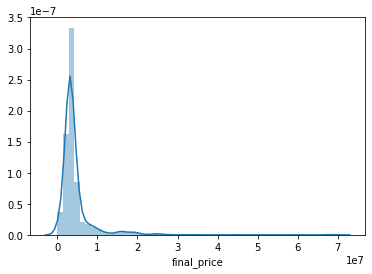

In [58]:
sns.distplot(df_train['final_price'])


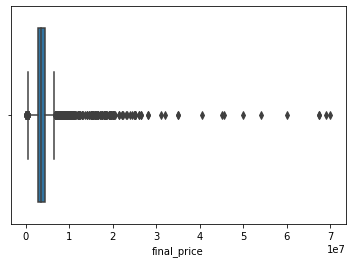

In [59]:
sns.boxplot(x=df_train['final_price'])

seems like it is skewed to right and have outliers ,so lets normalize it 

In [60]:
#normalizing using log scale
log_max = np.log(df_train['final_price'].max())
df_final_price_log= df_train['final_price']**(1/log_max)
df_train=df_train.drop(['final_price'],axis=1)
df_train['final_price']=df_final_price_log
 

recheck the distribution 

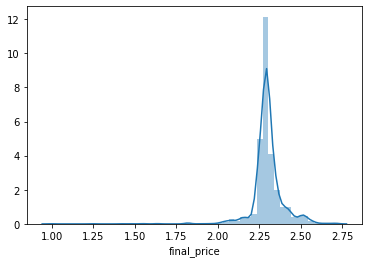

In [61]:
df_train["final_price"].describe()
sns.distplot(df_train['final_price']) 

#it is better than prev and all data re within range 1 -2.75 , as we have less data 2850 ,we will not drop the outlier data types 

now we can drop orderid column and check other features and normalize them

In [62]:
df_train=df_train.drop(['order_id'],axis=1)


In [67]:
df_train.columns,df_test.columns
#to make train and test dataframe same 
df_test=df_test.drop(['order_id'],axis=1)
df_test["final_price"]=np.nan

(Index(['F1', 'F2', 'F5', 'F6', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15',
        'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24',
        'final_price'],
       dtype='object'),
 Index(['F1', 'F2', 'F5', 'F6', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15',
        'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24',
        'final_price'],
       dtype='object'))

from the data , there are few date fields ,so we can just create features from them , i assume these dates represent order date ,order delivery and payment data ,so its better to create features as much possible and then move to other categorical and continous features 

I did have checked holiday for vietnam during the period  june 2018 to may 2019 ,so i have create a holiday list ,so it might have impact on price of order if its holiday 

In [68]:
vn_holiday=pd.Series(['2018-06-21','2018-06-28','2018-09-02','2018-09-03','2018-09-23','2018-10-20',
        '2018-10-31','2018-12-22','2018-12-24','2018-12-25','2018-12-31','2019-01-01',
        '2019-01-05','2019-02-02','2019-02-03','2019-02-04','2019-02-05','2019-02-06',
        '2019-02-07','2019-02-08','2019-02-09','2019-02-10','2019-02-14','2019-03-21',
        '2019-04-13','2019-04-14','2019-04-15','2019-04-29','2019-04-30','2019-05-01','2019-05-04'])

In [69]:
#get only date from F5 feature to compare if it falls on holiday ,to have a new feature 
df_train['F5_time'] =df_train['F5'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').date())
#will do same for test data 
df_test['F5_time'] =df_test['F5'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').date())


In [70]:
#create new feature that will have holiday (true /false for the specific date )
df_train['Holiday']= ""
df_test['Holiday']= ""

In [71]:

df_all=df_train.append(df_test)

In [72]:
 df_all.columns,df_train.columns,df_test.columns

(Index(['F1', 'F2', 'F5', 'F6', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15',
        'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24',
        'final_price', 'F5_time', 'Holiday'],
       dtype='object'),
 Index(['F1', 'F2', 'F5', 'F6', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15',
        'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24',
        'final_price', 'F5_time', 'Holiday'],
       dtype='object'),
 Index(['F1', 'F2', 'F5', 'F6', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15',
        'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24',
        'final_price', 'F5_time', 'Holiday'],
       dtype='object'))

In [73]:
df_all.shape

(3165, 23)

In [84]:
df_all.tail(3)

,F1,F2,F5,F6,F9,F10,F11,F12,F13,F14,...,F17,F18,F19,F20,F21,F22,F23,F24,final_price,Holiday
3162,98,1,2019-04-17 06:00:10.691634,2019-04-17 11:30:00,False,True,3,25.0,marketplace,android,...,2019-04-17 06:02:34.905732,0,10.768730,106.738068,5,10.659198,107.036401,22,NaN,False
3163,26,1,2019-04-28 07:00:01.828975,2019-04-28 12:45:23,False,True,3,30.0,marketplace,ios,...,2019-04-28 07:11:22.176447,0,10.770827,106.785392,5,10.045162,105.746854,1,NaN,False
3164,98,1,2019-04-12 00:53:54.318253,2019-04-12 09:00:00,False,True,3,15.0,marketplace,ios,...,2019-04-12 00:54:17.457172,0,10.626459,106.669436,39,10.757996,106.788932,5,NaN,False


In [75]:
df_all = df_all.reset_index(drop=True)

In [77]:
for i in range(len(df_all)):
    if str(df_all['F5_time'][i]) in set(vn_holiday.values):
        df_all['Holiday'][i]= True
    else:
        df_all["Holiday"][i]=False
        

/home/chandrakanta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/chandrakanta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
df_all=df_all.drop(['F5_time'],axis=1)

In [83]:
#create additional features from date features 
df_all['F6']=pd.to_datetime(df_all['F6'])
df_all['F17']=pd.to_datetime(df_all['F17'])
df_all['F5']=pd.to_datetime(df_all['F5'])

In [85]:
df_all['F5_hour'] = df_all.F5.apply(lambda x: x.hour)
df_all['F5_month'] = df_all.F5.apply(lambda x: x.month)
df_all['F5_weekday'] = df_all.F5.apply(lambda x: x.weekday())
df_all['F5_dayofyear']=df_all.F5.dt.dayofyear
df_all['F5_weekofyear'] =df_all.F5.dt.week
df_all['F6_hour'] = df_all.F6.apply(lambda x: x.hour)
df_all['F6_month'] = df_all.F6.apply(lambda x: x.month)
df_all['F6_weekday'] = df_all.F6.apply(lambda x: x.weekday())
df_all['F6_dayofyear']=df_all.F6.dt.dayofyear
df_all['F6_weekofyear'] =df_all.F6.dt.week
          
df_all['F17_hour'] = df_all.F17.apply(lambda x: x.hour)
df_all['F17_month'] = df_all.F17.apply(lambda x: x.month)
df_all['F17_weekday'] = df_all.F17.apply(lambda x: x.weekday())
df_all['F17_dayofyear']=df_all.F17.dt.dayofyear
df_all['F17_weekofyear'] =df_all.F17.dt.week
          

In [86]:
df_all.head(3)

,F1,F2,F5,F6,F9,F10,F11,F12,F13,F14,...,F6_hour,F6_month,F6_weekday,F6_dayofyear,F6_weekofyear,F17_hour,F17_month,F17_weekday,F17_dayofyear,F17_weekofyear
0,98,1,2019-04-17 05:39:47.992464,2019-04-17 13:45:00,False,True,3,17.0,marketplace,ios,...,13,4,2,107,16,5,4,2,107,16
1,25,1,2019-05-09 00:37:37.667157,2019-05-10 00:00:00,False,True,3,19.5,marketplace,android,...,0,5,4,130,19,2,5,3,129,19
2,26,1,2019-05-06 08:08:08.344504,2019-05-06 11:30:39,False,True,3,30.0,marketplace,ios,...,11,5,0,126,19,8,5,0,126,19


In [87]:
#create new feature of difference between F5,F6,F17
df_all['F6_F5']=np.nan
df_all['F6_F17']=np.nan
df_all['F17_F5']=np.nan



In [88]:
for i in range(len(df_all)):
    elapsed_time=df_all['F6'][i] - df_all['F5'][i]
    df_all['F6_F5'][i] = elapsed_time.total_seconds()/3600

/home/chandrakanta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [89]:
for i in range(len(df_all)):
    elapsed_time=df_all['F6'][i] - df_all['F17'][i]
    df_all['F6_F17'][i] = elapsed_time.total_seconds()/3600   

/home/chandrakanta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [90]:
for i in range(len(df_all)):
    elapsed_time=df_all['F17'][i] - df_all['F5'][i]
    df_all['F17_F5'][i] = elapsed_time.total_seconds()/3600


/home/chandrakanta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:
#taking back up 
df_all_bkup=df_all.copy()
df_all.head(3)

,F1,F2,F5,F6,F9,F10,F11,F12,F13,F14,...,F6_dayofyear,F6_weekofyear,F17_hour,F17_month,F17_weekday,F17_dayofyear,F17_weekofyear,F6_F5,F6_F17,F17_F5
0,98,1,2019-04-17 05:39:47.992464,2019-04-17 13:45:00,False,True,3,17.0,marketplace,ios,...,107,16,5,4,2,107,16,8.086669,8.048569,0.038099
1,25,1,2019-05-09 00:37:37.667157,2019-05-10 00:00:00,False,True,3,19.5,marketplace,android,...,130,19,2,5,3,129,19,23.372870,21.566863,1.806007
2,26,1,2019-05-06 08:08:08.344504,2019-05-06 11:30:39,False,True,3,30.0,marketplace,ios,...,126,19,8,5,0,126,19,3.375182,3.282350,0.092832


In [95]:
df_all.columns

Index(['F1', 'F2', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16',
       'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'final_price',
       'Holiday', 'F5_hour', 'F5_month', 'F5_weekday', 'F5_dayofyear',
       'F5_weekofyear', 'F6_hour', 'F6_month', 'F6_weekday', 'F6_dayofyear',
       'F6_weekofyear', 'F17_hour', 'F17_month', 'F17_weekday',
       'F17_dayofyear', 'F17_weekofyear', 'F6_F5', 'F6_F17', 'F17_F5'],
      dtype='object')

In [94]:
#now we can drop the date fields 
df_all=df_all.drop(['F5','F6','F17'],axis=1)


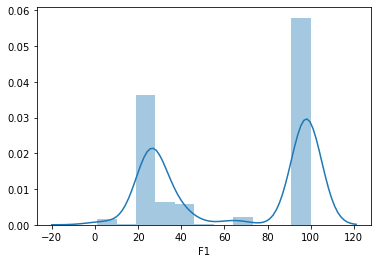

In [97]:
#now check other variables and visualize 

sns.distplot(df_all['F1']) 

In [99]:
df_all['F1'].value_counts()

(98     1636
 26      558
 25      470
 29       81
 40       41
 37       41
 35       39
 33       33
 64       30
 38       27
 42       25
 65       22
 1        19
 41       17
 44       16
 34       16
 31       12
 27       10
 66        9
 97        9
 5         8
 6         7
 3         6
 52        4
 9         4
 99        3
 7         3
 67        3
 90        2
 10        2
 47        2
 12        2
 18        1
 16        1
 100       1
 95        1
 69        1
 94        1
 58        1
 53        1
 Name: F1, dtype: int64, 1, 100)

In [100]:
#lets convert it into binning 
df_all['F1']=pd.cut(df_all['F1'],2, labels=["F1_1","F1_2"])


In [102]:
df_all['F1'].value_counts()

F1_2    1724
F1_1    1441
Name: F1, dtype: int64

(<matplotlib.axes._subplots.AxesSubplot at 0x7f87d41e5be0>, 1      3121
 2        15
 4         9
 3         8
 15        2
 7         2
 10        2
 101       1
 11        1
 5         1
 200       1
 20        1
 8         1
 Name: F2, dtype: int64)

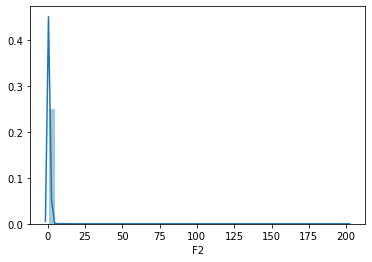

In [104]:
#now check for F2
sns.distplot(df_all['F2']) ,df_all['F2'].value_counts()

In [105]:
#make it categorical 
bn = Binarizer(threshold = 1)
pd_f2 = bn.transform([df_all['F2']])[0]
df_all['F2'] = pd_f2

(<matplotlib.axes._subplots.AxesSubplot at 0x7f87d326f550>, 3    2740
 5     356
 1      56
 6       6
 7       3
 8       2
 9       1
 2       1
 Name: F11, dtype: int64)

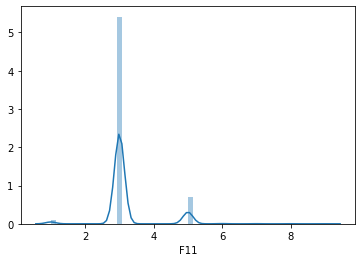

In [106]:
#check for F11
sns.distplot(df_all['F11']) ,df_all['F11'].value_counts()

In [109]:
#make it categorical 
bn = Binarizer(threshold = 3)
pd_f11 = bn.transform([df_all['F11']])[0]
df_all['F11'] = pd_f11

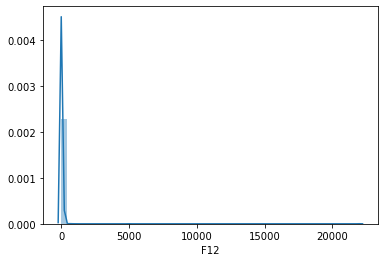

In [110]:
#now check for F12
sns.distplot(df_all['F12'])

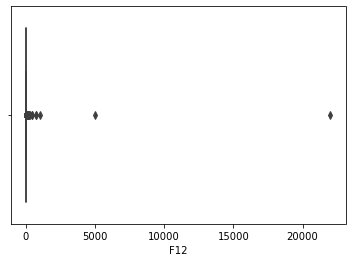

In [112]:
sns.boxplot(x=df_all['F12'])

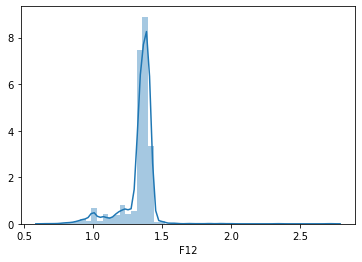

In [113]:
#seems it has few outliers , lets change to log scale retry
log_max = np.log(df_all['F12'].max())
df_F12= df_all['F12']**(1/log_max)
sns.distplot(df_F12)

In [115]:
#looks bit better ,
df_all['F12']=df_F12

In [120]:
df_all['F12'].max(),df_all['F12'].min()

(2.718281828459045, 0.6570330183268188)

In [121]:
#droping F15 as it has only false values , will not add values during training
df_all=df_all.drop(['F15'],axis=1)

In [123]:
df_all.columns
df_all.head(5)

,F1,F2,F9,F10,F11,F12,F13,F14,F16,F18,...,F6_dayofyear,F6_weekofyear,F17_hour,F17_month,F17_weekday,F17_dayofyear,F17_weekofyear,F6_F5,F6_F17,F17_F5
0,F1_2,0,False,True,0,1.327577,marketplace,ios,57661,0,...,107,16,5,4,2,107,16,8.086669,8.048569,0.038099
1,F1_1,0,False,True,0,1.345919,marketplace,android,65407,0,...,130,19,2,5,3,129,19,23.372870,21.566863,1.806007
2,F1_1,0,False,True,0,1.405173,marketplace,ios,64208,0,...,126,19,8,5,0,126,19,3.375182,3.282350,0.092832
3,F1_1,0,False,True,0,1.405173,marketplace,ios,66240,0,...,130,19,16,5,4,130,19,0.067978,-0.067424,0.135403
4,F1_2,0,False,True,0,1.395511,marketplace,android,59117,0,...,110,16,1,4,5,110,16,6.979487,6.970032,0.009455


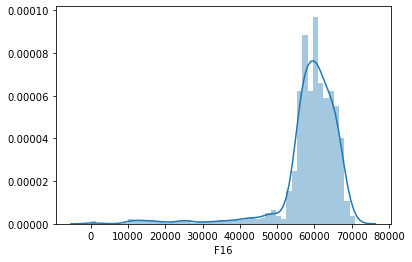

In [124]:
sns.distplot(df_all['F16'])
#df_org['F16']=pd.cut(df_org['F16'],3, labels=["F16_1", "F16_2", "F16_3"])


In [125]:
#seems like it represnts some id ,category ,lets bin it 
df_all['F16']=pd.cut(df_all['F16'],3, labels=["F16_1", "F16_2", "F16_3"])

In [127]:
df_all['F18'].value_counts()

0    3146
1      19
Name: F18, dtype: int64

#from data F19,F20,F22,F23 looks like  latitude and longitude values , as few of them i have googled it these represnts places of vietnam

In [129]:
#create features from lat and long
#new features using PCA  In this case it is not about dimension reduction 
#since he transformed 2D-> 2D. The rotation could help for decision tree splits, and it did actually.
coords = np.vstack((df_all[['F19', 'F20']].values,
                    df_all[['F22', 'F23']].values))
pca = PCA().fit(coords)



In [130]:
df_all['source_pca0'] = pca.transform(df_all[['F19', 'F20']])[:, 0]
df_all['source_pca1'] = pca.transform(df_all[['F19', 'F20']])[:, 1]
df_all['destination_pca0'] = pca.transform(df_all[['F22', 'F23']])[:, 0]
df_all['destination_pca1'] = pca.transform(df_all[['F22', 'F23']])[:, 1]

In [131]:
#create new distance features 
def haversine_(lat1, lng1, lat2, lng2):
    """function to calculate haversine distance between two co-ordinates"""
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return(h)

def manhattan_distance(lat1, lng1, lat2, lng2):
    """function to calculate manhatten distance between pick_drop"""
    a = haversine_(lat1, lng1, lat1, lng2)
    b = haversine_(lat1, lng1, lat2, lng1)
    return a + b


def bearing_distance(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [132]:
df_all.loc[:,'haversined']=haversine_(df_all['F19'],df_all['F20'],df_all['F22'],df_all['F23'])
df_all.loc[:,'manhattand']=manhattan_distance(df_all['F19'],df_all['F20'],df_all['F22'],df_all['F23'])
df_all.loc[:,'bearingd']=bearing_distance(df_all['F19'],df_all['F20'],df_all['F22'],df_all['F23'])

In [133]:
#center latitude and longitude 

df_all.loc[:, 'center_latitude'] = (df_all['F19'].values + df_all['F22'].values) / 2
df_all.loc[:, 'center_longitude'] = (df_all['F20'].values + df_all['F23'].values) / 2

In [136]:
#lets create new feature using clusters for the latitude and longitude 
from sklearn.cluster import MiniBatchKMeans
coords = np.vstack((df_all[['F19', 'F20']].values,
                    df_all[['F22', 'F23']].values))

In [137]:
len(coords)

6330

In [138]:
sample_ind = np.random.permutation(len(coords))[:6282]
kmeans = MiniBatchKMeans(n_clusters=5, batch_size=100).fit(coords[sample_ind])
 

In [139]:
df_all.loc[:, 'source_cluster'] = kmeans.predict(df_all[['F19', 'F20']])
df_all.loc[:, 'destination_cluster'] = kmeans.predict(df_all[['F22', 'F23']])

In [141]:
df_all.columns

Index(['F1', 'F2', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F16', 'F18',
       'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'final_price', 'Holiday',
       'F5_hour', 'F5_month', 'F5_weekday', 'F5_dayofyear', 'F5_weekofyear',
       'F6_hour', 'F6_month', 'F6_weekday', 'F6_dayofyear', 'F6_weekofyear',
       'F17_hour', 'F17_month', 'F17_weekday', 'F17_dayofyear',
       'F17_weekofyear', 'F6_F5', 'F6_F17', 'F17_F5', 'source_pca0',
       'source_pca1', 'destination_pca0', 'destination_pca1', 'haversined',
       'manhattand', 'bearingd', 'center_latitude', 'center_longitude',
       'source_cluster', 'destination_cluster'],
      dtype='object')

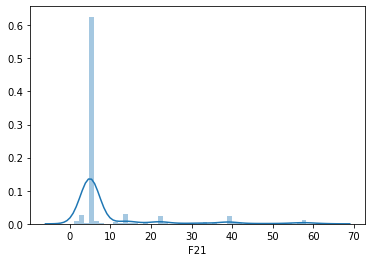

In [143]:
#check for F21 FEATURE 
sns.distplot(df_all['F21'])

In [144]:
df_all['F21']=pd.cut(df_all['F21'],2, labels=["F21_1", "F21_2"])


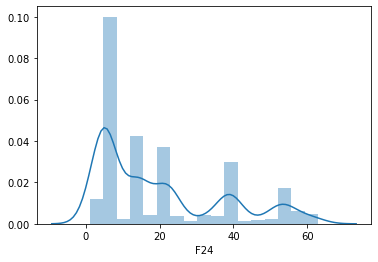

In [145]:
#check for F21 FEATURE 
sns.distplot(df_all['F24'])

In [146]:
#binarize f24
bn = Binarizer(threshold = 30)
pd_f24 = bn.transform([df_all['F24']])[0]
df_all['F24'] = pd_f24

In [147]:
df_all.head(5)

,F1,F2,F9,F10,F11,F12,F13,F14,F16,F18,...,source_pca1,destination_pca0,destination_pca1,haversined,manhattand,bearingd,center_latitude,center_longitude,source_cluster,destination_cluster
0,F1_2,0,False,True,0,1.327577,marketplace,ios,F16_3,0,...,-0.039163,-0.532435,0.293758,46.830984,65.579142,-53.098299,10.895077,106.566510,0,0
1,F1_1,0,False,True,0,1.345919,marketplace,android,F16_3,0,...,-0.039163,-0.272134,0.125107,61.178252,77.946656,-19.234527,11.028441,106.645655,0,0
2,F1_1,0,False,True,0,1.405173,marketplace,ios,F16_3,0,...,0.370123,-0.798182,-0.086533,65.201563,92.133985,47.704274,10.573678,106.564641,0,0
3,F1_1,0,False,True,0,1.405173,marketplace,ios,F16_3,0,...,-1.408406,-0.798182,-0.086533,145.081859,163.697008,-97.819598,10.860988,107.443294,0,0
4,F1_2,0,False,True,0,1.395511,marketplace,android,F16_3,0,...,-0.086533,-1.171138,-0.422969,55.388775,78.292138,136.154537,10.591103,106.960808,0,0


In [148]:
#We have done creatint new features ,next we have to check corelation, normalizing and encoding categorical features 

#we use cramers v rule for corelation of categorical features 

In [149]:
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


In [150]:
confusion_matrix = pd.crosstab(df_all["F1"],df_all["F2"])
cramers_v(confusion_matrix)

0.042303813912714594

not much corelation

In [151]:
confusion_matrix = pd.crosstab(df_all["F9"],df_all["F10"])
cramers_v(confusion_matrix)

0.06640769202440293

In [152]:
confusion_matrix = pd.crosstab(df_all["F13"],df_all["F14"])
cramers_v(confusion_matrix)

0.12228584391625832

In [153]:
confusion_matrix = pd.crosstab([df_all["F1"],df_all["F2"]],[df_all["F13"],df_all["F14"]])
cramers_v(confusion_matrix)

0.19434852798380853

there is bit corelation but not much so no action to be taken

In [154]:
#lets encode the categorical fields and then we will check for corelation of continous feautres 

In [155]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_all['F9']=le.fit_transform(df_all['F9'])

df_all['F10']=le.fit_transform(df_all['F10'])

In [156]:
df_all.columns

Index(['F1', 'F2', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F16', 'F18',
       'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'final_price', 'Holiday',
       'F5_hour', 'F5_month', 'F5_weekday', 'F5_dayofyear', 'F5_weekofyear',
       'F6_hour', 'F6_month', 'F6_weekday', 'F6_dayofyear', 'F6_weekofyear',
       'F17_hour', 'F17_month', 'F17_weekday', 'F17_dayofyear',
       'F17_weekofyear', 'F6_F5', 'F6_F17', 'F17_F5', 'source_pca0',
       'source_pca1', 'destination_pca0', 'destination_pca1', 'haversined',
       'manhattand', 'bearingd', 'center_latitude', 'center_longitude',
       'source_cluster', 'destination_cluster'],
      dtype='object')

In [157]:
#b4encode=df_all.copy()
df_all=pd.get_dummies(df_all, columns=["F1","F13","F14","F16","F21","Holiday"])

In [158]:
df_all.head(5)

,F2,F9,F10,F11,F12,F18,F19,F20,F22,F23,...,F14_legacy,F14_ops,F14_webapp,F16_F16_1,F16_F16_2,F16_F16_3,F21_F21_1,F21_F21_2,Holiday_False,Holiday_True
0,0,0,1,0,1.327577,0,10.768730,106.738068,11.021424,106.394952,...,0,0,0,0,0,1,1,0,1,0
1,0,0,1,0,1.345919,0,10.768730,106.738068,11.288151,106.553243,...,0,0,0,0,0,1,1,0,1,0
2,0,0,1,0,1.405173,0,10.376528,106.343889,10.770827,106.785392,...,0,0,0,0,0,1,0,1,1,0
3,0,0,1,0,1.405173,0,10.951149,108.101195,10.770827,106.785392,...,0,0,0,0,0,1,1,0,1,0
4,0,0,1,0,1.395511,0,10.770827,106.785392,10.411380,107.136224,...,0,0,0,0,0,1,1,0,1,0


In [160]:
#NOW we have done all encoding ,so we can check corelation matrix
df_all.corr(method ='pearson')


,F2,F9,F10,F11,F12,F18,F19,F20,F22,F23,...,F14_legacy,F14_ops,F14_webapp,F16_F16_1,F16_F16_2,F16_F16_3,F21_F21_1,F21_F21_2,Holiday_False,Holiday_True
F2,1.000000,0.007733,-0.249824,0.066371,0.059765,-0.009227,0.054431,-0.021437,0.074838,0.003668,...,0.121621,-0.011809,-0.004224,0.058914,0.055830,-0.080759,-0.044825,0.044825,0.051735,-0.051735
F9,0.007733,1.000000,-0.072890,0.232540,-0.236881,0.091909,0.125259,-0.013542,0.151618,0.003729,...,0.233141,-0.012211,-0.004367,0.129568,0.169579,-0.216382,-0.031437,0.031437,0.046362,-0.046362
F10,-0.249824,-0.072890,1.000000,-0.407786,0.406084,0.001472,-0.373945,0.063067,-0.354309,0.011466,...,-0.529801,-0.036249,-0.072275,-0.260546,-0.316593,0.414892,0.059299,-0.059299,-0.123944,0.123944
F11,0.066371,0.232540,-0.407786,1.000000,-0.608890,0.201490,0.631316,-0.210056,0.542103,-0.046808,...,0.610448,0.274191,0.098071,0.260213,0.400555,-0.484261,-0.151832,0.151832,0.117671,-0.117671
F12,0.059765,-0.236881,0.406084,-0.608890,1.000000,-0.175439,-0.427748,0.141661,-0.425007,0.071038,...,-0.518313,-0.080721,-0.060788,-0.290440,-0.314711,0.430841,0.078045,-0.078045,-0.102509,0.102509
F18,-0.009227,0.091909,0.001472,0.201490,-0.175439,1.000000,0.045387,-0.006289,0.073274,0.007346,...,-0.024635,0.075336,-0.002764,-0.011253,-0.016276,0.020076,0.007748,-0.007748,0.011522,-0.011522
F19,0.054431,0.125259,-0.373945,0.631316,-0.427748,0.045387,1.000000,-0.378346,0.653037,-0.022119,...,0.509507,0.242803,0.059735,0.159464,0.385189,-0.412526,-0.162069,0.162069,0.101800,-0.101800
F20,-0.021437,-0.013542,0.063067,-0.210056,0.141661,-0.006289,-0.378346,1.000000,-0.229212,0.003462,...,-0.104911,-0.087307,-0.043082,-0.013732,-0.066879,0.063452,0.166528,-0.166528,-0.012210,0.012210
F22,0.074838,0.151618,-0.354309,0.542103,-0.425007,0.073274,0.653037,-0.229212,1.000000,0.011045,...,0.501579,0.072834,0.049648,0.191317,0.308404,-0.367564,-0.149391,0.149391,0.084634,-0.084634
F23,0.003668,0.003729,0.011466,-0.046808,0.071038,0.007346,-0.022119,0.003462,0.011045,1.000000,...,-0.066546,0.048976,0.002764,-0.008039,-0.081208,0.071990,-0.007828,0.007828,0.001148,-0.001148


#From the corealtion matrix , there are some corelation but not too much like (F11 and F19),so we will keep as it is and procees for training


In [161]:
#before that we will scale all the features 
scalar=RobustScaler()


In [162]:
df_all[['F5_hour','F5_month','F5_weekday','F5_dayofyear','F5_weekofyear']]=scalar.fit_transform(df_all[['F5_hour','F5_month','F5_weekday','F5_dayofyear','F5_weekofyear']])
df_all[['F6_hour','F6_month','F6_weekday','F6_dayofyear','F6_weekofyear']]=scalar.fit_transform(df_all[['F6_hour','F6_month','F6_weekday','F6_dayofyear','F6_weekofyear']])
df_all[['F17_hour','F17_month','F17_weekday','F17_dayofyear','F17_weekofyear']]=scalar.fit_transform(df_all[['F17_hour','F17_month','F17_weekday','F17_dayofyear','F17_weekofyear']])
df_all[['F6_F5','F6_F17','F17_F5']]=scalar.fit_transform(df_all[['F6_F5','F6_F17','F17_F5']])


In [163]:
df_all[['F12','F19','F20','F22','F23','source_cluster','destination_cluster', 'source_pca0', 
        'source_pca1', 'destination_pca0','destination_pca1','haversined', 'manhattand', 'bearingd',
        'center_latitude','center_longitude']]=scalar.fit_transform(df_all[['F12','F19','F20','F22','F23',
                                          'source_cluster','destination_cluster', 'source_pca0', 
                                          'source_pca1', 'destination_pca0','destination_pca1', 
                                          'haversined', 'manhattand', 'bearingd','center_latitude', 'center_longitude']])

In [164]:
df_all.head(3)

,F2,F9,F10,F11,F12,F18,F19,F20,F22,F23,...,F14_legacy,F14_ops,F14_webapp,F16_F16_1,F16_F16_2,F16_F16_3,F21_F21_1,F21_F21_2,Holiday_False,Holiday_True
0,0,0,1,0,-0.653273,0,0.000000,0.000000,0.753665,-0.970542,...,0,0,0,0,0,1,1,0,1,0
1,0,0,1,0,-0.307738,0,0.000000,0.000000,1.636016,-0.410843,...,0,0,0,0,0,1,1,0,1,0
2,0,0,1,0,0.808503,0,-30.567229,-6.790423,-0.075328,0.410009,...,0,0,0,0,0,1,0,1,1,0


In [166]:
#now proceed for training 
#so before that we have to split off the train test data as earlier we have combined them for feature enginerring process



In [172]:
df_all.shape

((3165, 59), (315, 23), (2850, 23))

In [177]:
train_df=df_all.loc[:2849,]

In [178]:
train_df.shape

(2850, 59)

In [183]:
test_df=df_all.loc[2850:]

In [185]:
test_df.shape

(315, 59)

In [187]:
x=train_df.drop(['final_price'],axis=1)
y=train_df['final_price']
kf = KFold(n_splits=10, random_state=42, shuffle=True)


In [188]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))



def cv_rmse(model, X=x):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error",cv=kf))
    return (rmse)


#below ML Model , i have done trianing in local and already got  best hyper paramters for them,so i will directly using them as parms

In [192]:
lightgbm = LGBMRegressor(objective='regression',
num_leaves=7,
learning_rate=0.01,reg_lambda=1.2,
reg_alpha=0.1,
n_estimators=1200,
max_bin=50,
bagging_fraction=0.2,
bagging_freq=8,
min_sum_hessian_in_leaf=7,
verbose=-1,
subsample=0.7,
max_depth=5,colsample_bytree=0.7,
random_state=42)

In [193]:
scores = {}
score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std
()))
scores['lgb'] = (score.mean(), score.std())


lightgbm: 0.0660 (0.0198)


In [194]:
xgboost = XGBRegressor(learning_rate=0.01,
n_estimators=1000,
max_depth=5,
min_child_weight=4,
gamma=0.0,
subsample=0.8,
colsample_bytree=0.5,
objective='reg:linear',
nthread=-1,
seed=27,
reg_alpha=0.0001,
random_state=42)

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std
()))
scores['xgb'] = (score.mean(), score.std())

/home/chandrakanta/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/chandrakanta/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/chandrakanta/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/chandrakanta/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/chandrakanta/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
 

xgboost: 0.0641 (0.0206)


In [197]:
#ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=20,cv=kf))
ridge=Ridge(alpha=20)
score = cv_rmse(ridge)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std())



ridge: 0.0781 (0.0218)


In [198]:
svr = make_pipeline(RobustScaler(), SVR(C= 1, epsilon= 0.001, gamma='auto'))
score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std())

SVR: 0.0772 (0.0163)


In [199]:
gbr = GradientBoostingRegressor(n_estimators=2000,subsample=0.5,
learning_rate=0.001,
max_depth=10,
max_features='auto',
min_samples_leaf=5,
min_samples_split=10,
random_state=42)

score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gbr'] = (score.mean(), score.std())


gbr: 0.0630 (0.0198)


In [200]:
rf = RandomForestRegressor(n_estimators=1000,max_depth=12,
min_samples_split=5,
min_samples_leaf=2,
max_features='auto',
oob_score=True,bootstrap='True',
random_state=42)

score = cv_rmse(rf)
print("rf: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['rf'] = (score.mean(), score.std())

rf: 0.0622 (0.0203)


In [203]:
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm,ridge,svr,gbr, rf),
            meta_regressor=xgboost,use_features_in_secondary=True)



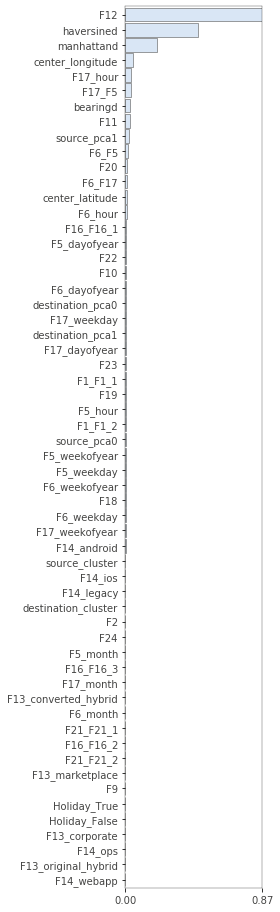

In [204]:
#before blending all models to fit on whole data below is to check the feature importance

from rfpimp import *

rf_model = rf.fit(x,y)

imp = importances(rf_model, x, y, n_samples=-1)
viz = plot_importances(imp)
viz.view()

In [205]:
stack_gen_model = stack_gen.fit(np.array(x), np.array(y))

In [206]:
lgb_model = lightgbm.fit(x,y)
xgb_model=xgboost.fit(x,y)
ridge_model=ridge.fit(x,y)
svr_model=svr.fit(x,y)
gbr_model=gbr.fit(x,y)
rf_model=rf.fit(x,y)


/home/chandrakanta/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/chandrakanta/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [222]:
def blended_predictions(x):
    return ((0.05 * ridge_model.predict(x)) + \
            (0.05 * svr_model.predict(x)) + \
            (0.1 * gbr_model.predict(x)) + \
            (0.1 * xgb_model.predict(x)) + \
            (0.1 * lgb_model.predict(x)) + \
            (0.25 * rf_model.predict(x)) + \
            (0.35 * stack_gen_model.predict(np.array(x))))

In [224]:
blended_score = rmse(y, blended_predictions(x))
scores['blended'] = (blended_score, 0)
print('RMSE score on train data:')
print(blended_score)

RMSE score on train data:
0.03617374346776829


this is the lowest RMSE we got 

In [228]:
x1=test_df.drop(["final_price"],axis=1)

In [231]:
#predict

In [229]:
predictions=blended_predictions(x1)

In [235]:
#converting back to normal values -->  log_max = np.log(df_target['final_price'].max())
predicted_price=predictions**log_max

In [238]:
df_test.shape

(315, 23)

In [239]:
df_test["final_price"]=predicted_price

In [242]:
df_test["final_price"]=df_test["final_price"].round(2)

In [244]:
df_test.to_csv("test_prices.csv")